<p style="text-align: center;font-size: 60px;">Stars</p>
<br\><br\>
PLAsTiCC Astronomical Classification<br/>
https://www.kaggle.com/c/PLAsTiCC-2018

1. Problem: Can we identify star's type based on observed information? 
2. Goal: Categorize star type based on their constant properties and light ratio changes in different passbands
3. Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Show Training Metadata

In [3]:
# Load and Show Training Metatata
# tm: train_metadata
TM = pd.read_csv('training_set_metadata.csv')
print(TM.shape[0])
TM.sort_values(by=['object_id'], ascending=True).head(10)

7848


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90
7,1632,348.595886,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,0.021,42
8,1920,149.414062,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,0.027,90
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,0.018,65


## For each target class, seperate data into training set(70%) and validataion set(30%)

In [4]:
def split_train_validation(df, validation_ratio):
    ''' split data into train set and validation set for each target class'''
    
    train = pd.DataFrame(columns=df.columns)
    validation = pd.DataFrame(columns=df.columns)
    
    targets = sorted(list(df['target'].unique()))
    np.random.seed(4)
    for target in targets:
        sub_df = df[df['target']==target].sort_values(by=['object_id'])
        
        msk = np.random.rand(len(sub_df)) > validation_ratio
        train = train.append(sub_df[msk], ignore_index=True)
        validation = validation.append(sub_df[~msk], ignore_index=True)
        
    train.sort_values(by=['object_id'], inplace=True)
    validation.sort_values(by=['object_id'], inplace=True)
    return train.drop(['target'], axis=1), train[['target']], validation.drop(['target'], axis=1), validation[['target']]
#     return train[train.columns.difference(['target'])], train.loc['target'], validation[validation.columns.difference(['target'])], validation.loc['target']


In [5]:
trainX, trainY, validationX, validationY = split_train_validation(df=TM, validation_ratio=0.3)
if (trainX.shape[0] + validationX.shape[0]) != TM.shape[0]:
    print("ERROR: data amount doesn't match")

In [6]:
# .to_string(index=False) is for removing index
print(trainX.head(10)['object_id'].to_string(index=False), '\n')
print(validationX.head(10)['object_id'].to_string(index=False))

713
 730
 745
1124
2072
2103
2300
2330
2677
2922 

615
1227
1598
1632
1920
1926
2624
3285
4132
4173


In [8]:
## Show data distribution in each group
def show_size(df, col):
    print('Total amount of data:', df.shape[0])
    grouped = df.groupby([col]).size()
    
    grouped.plot.bar()
    plt.show()

Total amount of data: 5470


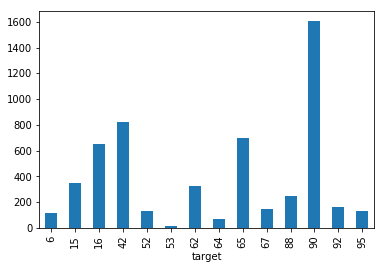

In [10]:
show_size(df=trainY, col='target')

Total amount of data: 2378


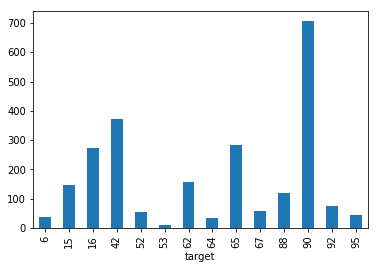

In [11]:
show_size(df=validationY, col='target')

In [ ]:
# trainX.corr()
# corr.style.background_gradient()

In [10]:
# result: trainX, trainY, validationX, validationY